In [29]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Exercises
### 1. Spam Data

### A. Load the spam data set

In [6]:
spam = pd.read_csv('spam.csv',
                  encoding='latin-1',
                  usecols=[0,1])
spam.columns = ['label', 'text']
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
def basic_clean(text):
    text = (unicodedata.normalize('NFKD', text.lower())
           .encode('ascii', 'ignore')
           .decode('utf-8', 'ignore')
           )
    return re.sub(r"[^a-z0-9\s]", '', text)

In [9]:
spam['text_cleaned'] = spam.text.apply(basic_clean)
spam.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [10]:
def tokenize(string):
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

In [11]:
spam['text_tokenized'] = spam.text_cleaned.apply(tokenize)
spam.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [12]:
def lemmatize(string):
    wnl = nltk.stem.WordNetLemmatizer()
    
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    string = ' '.join(lemmas)
    
    return string

In [13]:
spam['text_lemmatized'] = spam.text_tokenized.apply(lemmatize)
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...


In [14]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    stopword_list = stopwords.words('english')
    
    stopword_list = set(stopword_list) - set(exclude_words)
    
    stopword_list = stopword_list.union(set(extra_words))
    
    words = string.split()
    
    filtered_words = [word for word in words if word not in stopword_list]
    
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [15]:
spam['text_filtered'] = spam.text_lemmatized.apply(remove_stopwords)
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


In [16]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in spam.text_filtered]
spam = pd.concat([spam, pd.DataFrame({'words': words})], axis=1)
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"


In [17]:
spam['doc_length'] = [len(wordlist) for wordlist in spam.words]
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8


### B. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [18]:
spam['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in spam.words]
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8,"[(nah, dont), (dont, think), (think, go), (go,..."


In [24]:
ham_words = ' '.join(spam[spam.label=='ham'].text_filtered)
spam_words = ' '.join(spam[spam.label=='spam'].text_filtered)
all_words = ' '.join(spam.text_filtered)

In [23]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)

In [25]:
spam['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in spam.words]
spam.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8,"[(nah, dont), (dont, think), (think, go), (go,..."


In [50]:
print('Spam bigrams:')
print(spam_bigrams)
print()
print('Ham bigrams:')
print(ham_bigrams)

Spam bigrams:
(please, call)          44
(customer, service)     27
(po, box)               24
(contact, u)            24
(guaranteed, call)      23
(i121000, cash)         23
(prize, guaranteed)     22
(send, stop)            19
(await, collection)     19
(every, week)           19
(urgent, mobile)        18
(land, line)            18
(claim, call)           17
(valid, 12hrs)          17
(2, claim)              17
(account, statement)    16
(sae, tc)               16
(call, 08000930705)     16
(reply, call)           15
(call, mobileupd8)      15
dtype: int64

Ham bigrams:
(call, later)      52
(ill, call)        48
(let, know)        41
(sorry, ill)       39
(r, u)             37
(u, r)             33
(dont, know)       32
(wan, 2)           31
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(u, wan)           23
(u, get)           23
(pls, send)        22
(ok, lor)          22
(im, gonna)        20
(happy, new)       19
(good, night)      19
(

In [37]:
ham_data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
spam_data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}

In [39]:
ham_cloud = WordCloud(background_color='white',
                     height=400, width=800).generate_from_frequencies(ham_data)

spam_cloud = WordCloud(background_color='white',
                      height=400, width=800).generate_from_frequencies(spam_data)

(-0.5, 799.5, 399.5, -0.5)

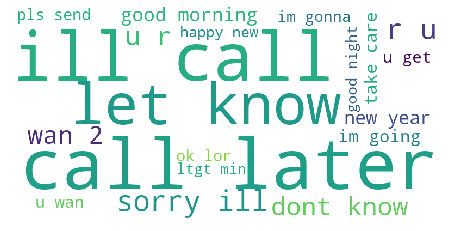

In [46]:
plt.figure(figsize=(8, 4))
plt.imshow(ham_cloud)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

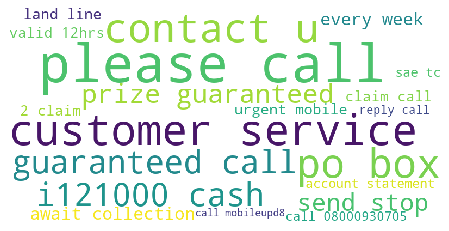

In [47]:
plt.figure(figsize=(8, 4))
plt.imshow(spam_cloud)
plt.axis('off')

**Takeaways:** The spam bigrams have a lot more buisiness oriented language than the ham bigrams. The top bigrams for both spam and ham mention "call" however the ham bigrams either pair it up with "later" or "I'll" which doesn't add urgency to it unlike the spam bigram. The spam bigrams seem to carry a sense of urgency unlike the ham bigrams.

### C. Is there any overlap in the bigrams for the spam data and the ham data?

### Trigrams

In [51]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)

In [52]:
print('Spam Trigrams:')
print(spam_trigrams)
print()
print('Ham Trigrams:')
print(ham_trigrams)

Spam Trigrams:
(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(reply, call, 08000930705)             14
(2003, account, statement)             13
(private, 2003, account)               13
(camcorder, reply, call)               12
(show, 800, unredeemed)                12
(guaranteed, i121000, cash)            12
(anytime, network, min)                11
(bonus, caller, prize)                 11
(urgent, trying, contact)              11
(every, week, txt)                     11
(tone, 4, ur)                          11
(please, call, customer)               11
(free, entry, 2)                       11
(speak, live, operator)                10
(customer, service, representative)    10
(cash, await, collection)              10
(i122000, bonus, caller)               10
dtype: int64

Ham Trigrams:
(ill, call, later)          42
(sorry, ill, call)          38
(u, wan, 2)                 21
(happy, new, year)      

In [53]:
ham_tridata = {k[0] + ' ' + k[1]: v for k, v in ham_trigrams.to_dict().items()}
spam_tridata = {k[0] + ' ' + k[1]: v for k, v in spam_trigrams.to_dict().items()}

In [66]:
ham_tricloud = WordCloud(background_color='white',
                     height=400, width=1200).generate_from_frequencies(ham_tridata)

spam_tricloud = WordCloud(background_color='white',
                      height=400, width=1200).generate_from_frequencies(spam_tridata)

Text(0.5, 1.0, 'Ham')

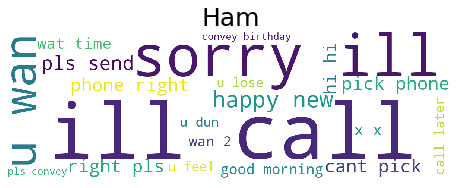

In [79]:
plt.figure(figsize=(8, 4))
plt.imshow(ham_tricloud)
plt.axis('off')
plt.title('Ham', fontsize=25)

Text(0.5, 1.0, 'Spam')

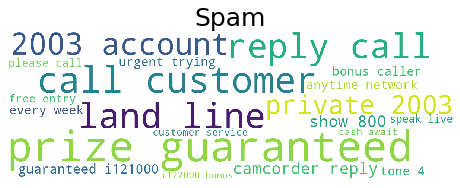

In [80]:
plt.figure(figsize=(8, 4))
plt.imshow(spam_tricloud)
plt.axis('off')
plt.title('Spam', fontsize=25)